# Supply Chain Transport Mode Analysis: Problem Statement

## Business Context
In supply chain logistics, different transport modes (Air, Sea, Rail, Road) have distinct characteristics that affect:
- Delivery speed and reliability
- Cost structures
- Risk profiles
- Environmental impact

## Problem Definition
We need to:
1. **Infer Transport Modes**: Use operational data to identify transport modes without explicit labels
2. **Analyze Risk Patterns**: Understand how different modes relate to key risk metrics:
   - Disruption Likelihood Score (0-1)
   - Delay Probability (0-1)
   - Risk Classification
   - Delivery Time Deviation (hours)

## Business Value
- Better mode-specific risk management
- Optimized mode selection based on risk tolerance
- Improved contingency planning
- Data-driven transport decisions


In [18]:
# Setup and Data Loading
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# Set figure style
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

# Load data
DATA_PATH = 'dynamic_supply_chain_logistics_dataset.csv'
na_tokens = ['', ' ', 'na', 'n/a', 'NA', 'N/A', 'null', 'NULL', 'none', 'None', 'nan', 'NaN', 'NAN', '-', '--']
df = pd.read_csv(DATA_PATH, na_values=na_tokens, keep_default_na=True, low_memory=False)

print('Dataset Overview:')
print('-' * 50)
print(f'Total records: {len(df):,}')
print(f'Total features: {len(df.columns):,}')
print('\nFeature types:')
print(df.dtypes.value_counts())
print('\nSample of available features:')
print(df.columns.tolist()[:10])


Dataset Overview:
--------------------------------------------------
Total records: 32,065
Total features: 26

Feature types:
float64    24
object      2
Name: count, dtype: int64

Sample of available features:
['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status']


## Target Variable Analysis

Let's examine our key risk metrics (target variables) to understand:
1. Their distributions and ranges
2. Potential relationships between risk measures
3. Data quality issues we need to address
4. Insights that could inform our transport mode analysis


In [19]:
# Analyze target variables
TARGET_VARS = {
    'disruption_likelihood_score': 'Disruption Likelihood',
    'delay_probability': 'Delay Probability',
    'risk_classification': 'Risk Level',
    'delivery_time_deviation': 'Delivery Deviation (hrs)'
}

# Check availability and basic stats
print("Target Variable Statistics:")
print('-' * 50)
for var, label in TARGET_VARS.items():
    if var in df.columns:
        missing = df[var].isna().sum()
        missing_pct = (missing / len(df)) * 100
        print(f"\n{label}:")
        print(f"- Missing values: {missing:,} ({missing_pct:.1f}%)")
        if df[var].dtype.kind in 'iuf':  # numeric
            print(f"- Range: {df[var].min():.2f} to {df[var].max():.2f}")
            print(f"- Mean: {df[var].mean():.2f}")
            print(f"- Median: {df[var].median():.2f}")
        else:  # categorical
            print("- Categories:", df[var].nunique())
            print("- Most common:", df[var].mode().iloc[0])
    else:
        print(f"\n{label} not found in dataset")


Target Variable Statistics:
--------------------------------------------------

Disruption Likelihood:
- Missing values: 0 (0.0%)
- Range: 0.00 to 1.00
- Mean: 0.80
- Median: 0.96

Delay Probability:
- Missing values: 0 (0.0%)
- Range: 0.00 to 1.00
- Mean: 0.70
- Median: 0.84

Risk Level:
- Missing values: 0 (0.0%)
- Categories: 3
- Most common: High Risk

Delivery Deviation (hrs):
- Missing values: 0 (0.0%)
- Range: -2.00 to 10.00
- Mean: 5.18
- Median: 6.11


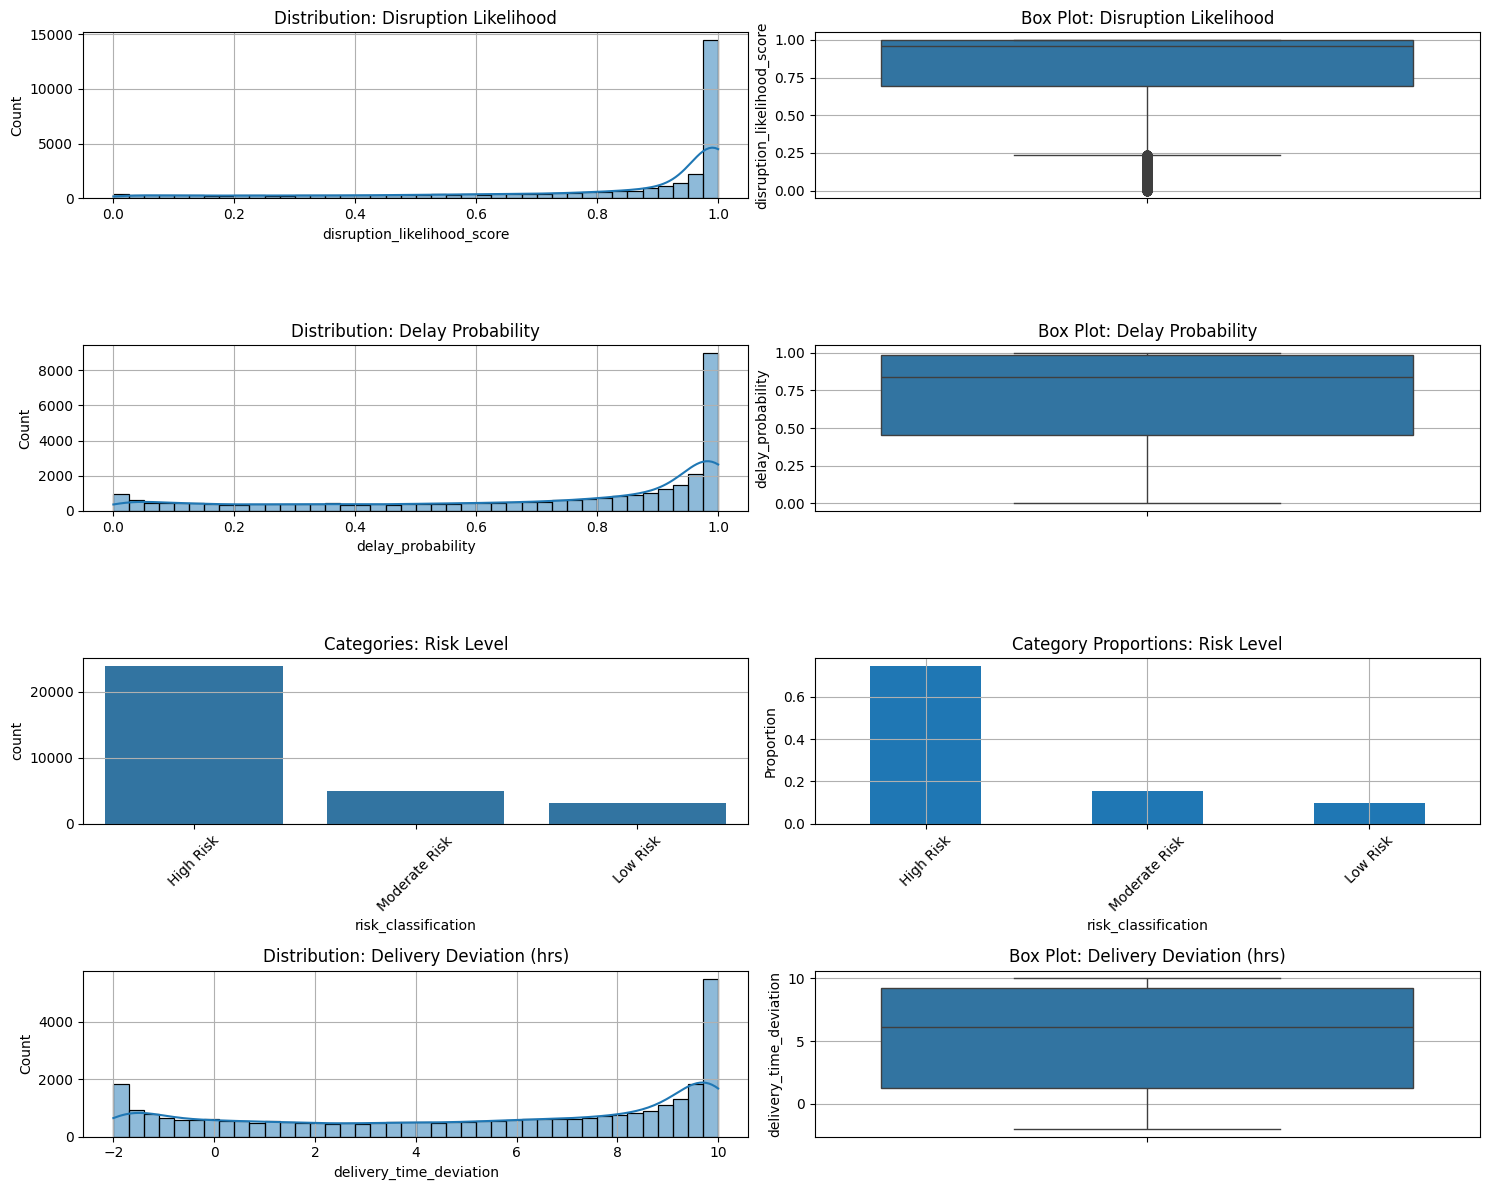

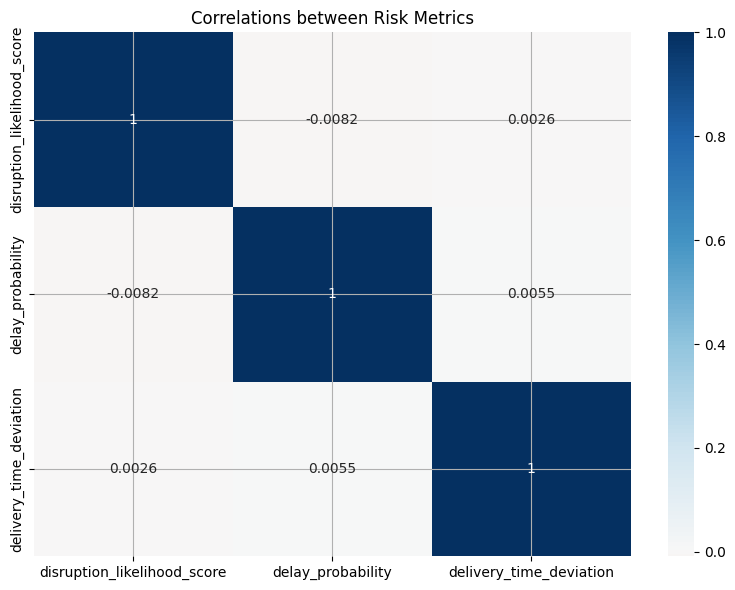

In [20]:
# Visualize target variable distributions
available_targets = [var for var in TARGET_VARS if var in df.columns]
n_targets = len(available_targets)

plt.figure(figsize=(15, 3*n_targets))
for i, var in enumerate(available_targets, 1):
    # Distribution plot
    plt.subplot(n_targets, 2, 2*i-1)
    if df[var].dtype.kind in 'iuf':
        sns.histplot(data=df, x=var, bins=40, kde=True)
        plt.title(f'Distribution: {TARGET_VARS[var]}')
    else:
        sns.countplot(data=df, x=var, order=df[var].value_counts().index)
        plt.title(f'Categories: {TARGET_VARS[var]}')
        plt.xticks(rotation=45)
    
    # Box plot or bar plot
    plt.subplot(n_targets, 2, 2*i)
    if df[var].dtype.kind in 'iuf':
        sns.boxplot(data=df, y=var)
        plt.title(f'Box Plot: {TARGET_VARS[var]}')
    else:
        df[var].value_counts(normalize=True).plot(kind='bar')
        plt.title(f'Category Proportions: {TARGET_VARS[var]}')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# If we have multiple numeric targets, show their correlations
numeric_targets = [var for var in available_targets if df[var].dtype.kind in 'iuf']
if len(numeric_targets) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_targets].corr(), annot=True, cmap='RdBu', center=0)
    plt.title('Correlations between Risk Metrics')
    plt.tight_layout()
    plt.show()


## Key Observations and Next Steps

### Target Variable Insights
1. **Distribution Patterns**
   - Note any skewness or unusual patterns in the risk scores
   - Identify if delivery deviations follow expected patterns
   - Check if risk classifications are balanced

2. **Relationships**
   - Examine correlations between numeric risk measures
   - Consider if relationships make business sense
   - Look for potential redundancy in risk metrics

### Next Steps
1. **Feature Engineering**
   - Calculate speed from GPS coordinates
   - Derive time-based features from timestamps
   - Engineer mode-indicative features (e.g., cost per distance)

2. **Clustering Approach**
   - Use unsupervised learning to identify natural transport mode groups
   - Validate clusters against domain knowledge
   - Analyze how risk profiles vary by inferred mode

3. **Business Applications**
   - Develop mode-specific risk thresholds
   - Create risk-based mode selection guidelines
   - Identify opportunities for risk mitigation by mode


## Extended Analysis: Feature Correlations and Mode-Specific Patterns

Let's explore:
1. Correlations between target variables and operational features
2. How risk metrics vary across different transport modes
3. Key operational indicators that might influence risk levels


Loading expanded dataset and preparing for correlation analysis...

Missing values in analysis columns:
fuel_consumption_rate          0
traffic_congestion_level       0
port_congestion_level          0
shipping_costs                 0
lead_time_days                 0
speed_kmh                      1
loading_unloading_time         0
customs_clearance_time         0
route_risk_level               0
disruption_likelihood_score    0
delay_probability              0
delivery_time_deviation        0
dtype: int64


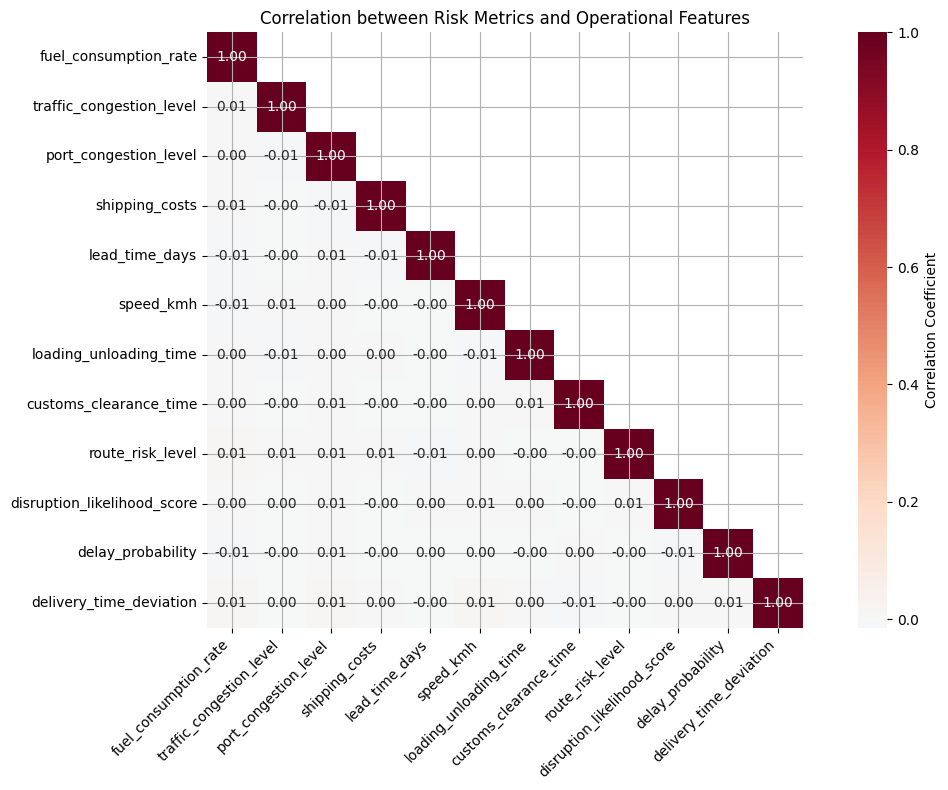


Strongest correlations with risk metrics:
--------------------------------------------------

disruption_likelihood_score:

Top 3 positive correlations:
route_risk_level         0.006345
port_congestion_level    0.005405
speed_kmh                0.005344

Top 3 negative correlations:
customs_clearance_time   -0.000113
shipping_costs           -0.002374
delay_probability        -0.008175

delay_probability:

Top 3 positive correlations:
port_congestion_level      0.008972
delivery_time_deviation    0.005530
customs_clearance_time     0.004896

Top 3 negative correlations:
traffic_congestion_level      -0.003790
disruption_likelihood_score   -0.008175
fuel_consumption_rate         -0.013655

delivery_time_deviation:

Top 3 positive correlations:
fuel_consumption_rate    0.012495
port_congestion_level    0.010612
speed_kmh                0.009963

Top 3 negative correlations:
route_risk_level         -0.000076
lead_time_days           -0.002460
customs_clearance_time   -0.009244


In [21]:
# Feature Correlation Analysis
print("Loading expanded dataset and preparing for correlation analysis...")

# Load expanded dataset with transport modes
expanded_df = pd.read_csv('dynamic_supply_chain_with_modes_expanded.csv')

# Define operational features for analysis
operational_features = [
    'fuel_consumption_rate',
    'traffic_congestion_level',
    'port_congestion_level',
    'shipping_costs',
    'lead_time_days',
    'speed_kmh',
    'loading_unloading_time',
    'customs_clearance_time',
    'route_risk_level'
]

# Define target variables (excluding categorical ones)
numeric_targets = [
    'disruption_likelihood_score',
    'delay_probability',
    'delivery_time_deviation'
]

# Combine features for correlation analysis
analysis_cols = operational_features + numeric_targets
correlation_data = expanded_df[analysis_cols].copy()

# Check for any missing values
print("\nMissing values in analysis columns:")
print(correlation_data.isnull().sum())

# Create correlation matrix
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation between Risk Metrics and Operational Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations for each target variable
print("\nStrongest correlations with risk metrics:")
print("-" * 50)
for target in numeric_targets:
    correlations = correlation_matrix[target].sort_values(ascending=False)
    print(f"\n{target}:")
    print("\nTop 3 positive correlations:")
    print(correlations[1:4].to_string())  # Skip first (self-correlation)
    print("\nTop 3 negative correlations:")
    print(correlations[-3:].to_string())


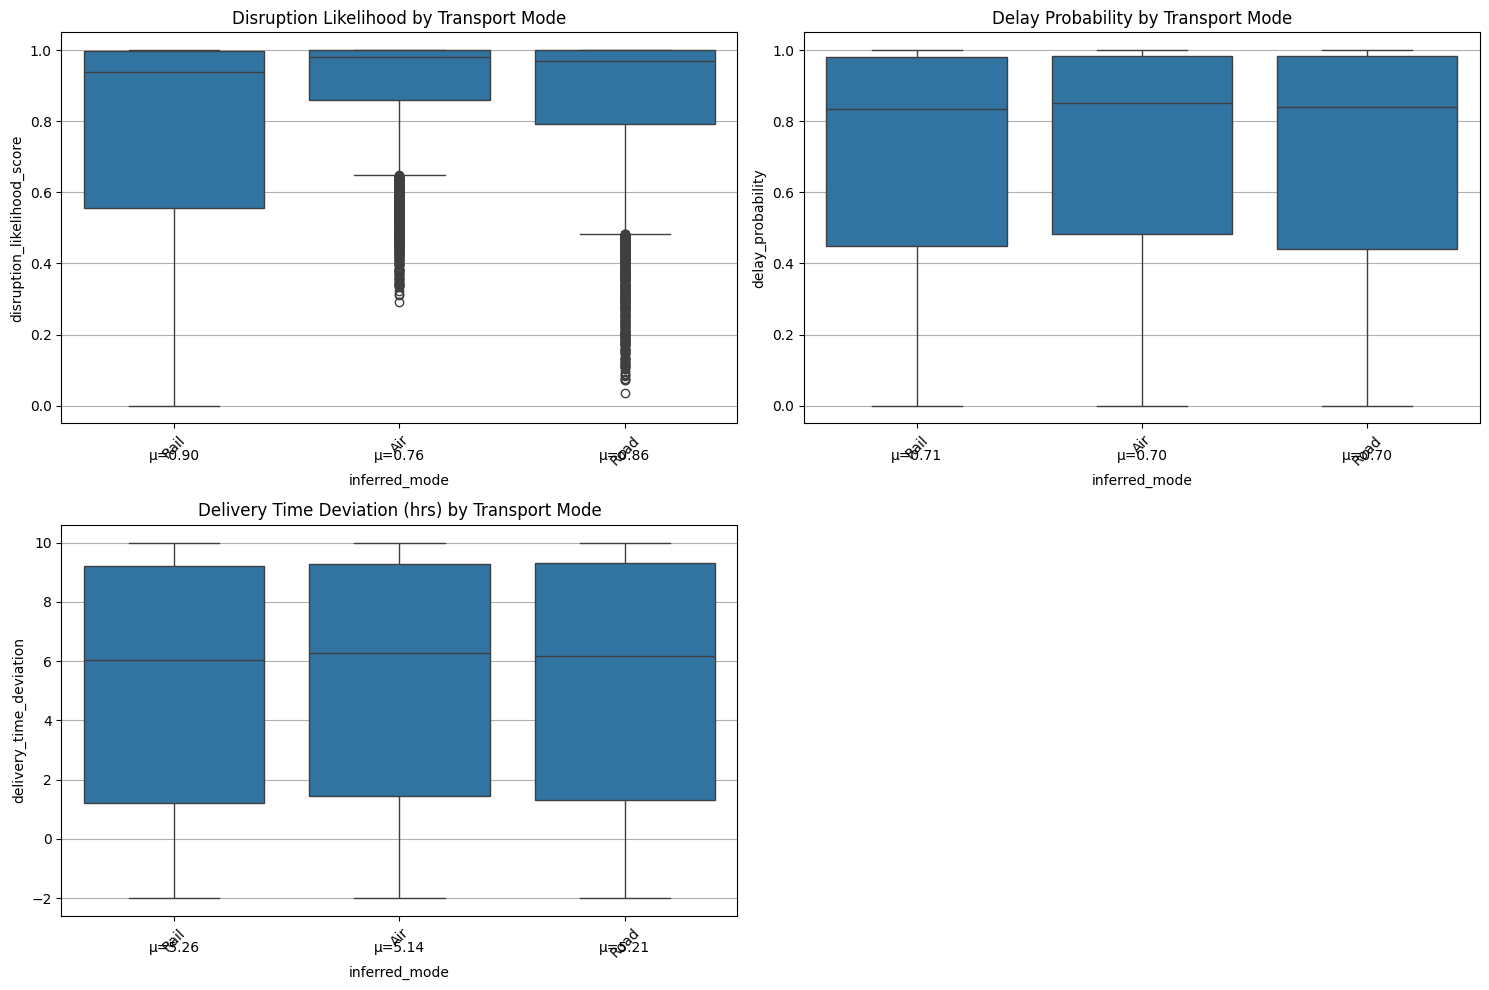


Risk Metric Summary by Transport Mode:
--------------------------------------------------

Disruption Likelihood:
                Mean  Median  Std Dev  Count  % of Total
inferred_mode                                           
Air            0.903   0.981    0.145   6634        20.7
Rail           0.758   0.940    0.314  20589        64.2
Road           0.860   0.969    0.205   4842        15.1

Overall Statistics:
Mean      0.804
Median    0.958
Min       0.000
Max       1.000
Name: disruption_likelihood_score, dtype: float64

Delay Probability:
                Mean  Median  Std Dev  Count  % of Total
inferred_mode                                           
Air            0.709   0.851    0.320   6634        20.7
Rail           0.697   0.836    0.325  20589        64.2
Road           0.696   0.839    0.329   4842        15.1

Overall Statistics:
Mean      0.699
Median    0.840
Min       0.000
Max       1.000
Name: delay_probability, dtype: float64

Delivery Time Deviation (hrs):
   

In [22]:
# Analyze risk metrics by transport mode using the expanded dataset
plt.figure(figsize=(15, 10))

# Define numeric risk metrics
risk_metrics = {
    'disruption_likelihood_score': 'Disruption Likelihood',
    'delay_probability': 'Delay Probability',
    'delivery_time_deviation': 'Delivery Time Deviation (hrs)'
}

# Create subplots for each risk metric
for i, (metric, label) in enumerate(risk_metrics.items(), 1):
    plt.subplot(2, 2, i)
    
    # Create boxplot with expanded dataset
    sns.boxplot(data=expanded_df, x='inferred_mode', y=metric)
    plt.title(f'{label} by Transport Mode')
    plt.xticks(rotation=45)
    
    # Calculate and display mean values
    means = expanded_df.groupby('inferred_mode')[metric].mean()
    ylim = plt.ylim()
    y_pos = ylim[0] - (ylim[1] - ylim[0]) * 0.1
    for j, mean in enumerate(means):
        plt.text(j, y_pos, f'μ={mean:.2f}', 
                horizontalalignment='center', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics by mode
print("\nRisk Metric Summary by Transport Mode:")
print("-" * 50)
for metric, label in risk_metrics.items():
    print(f"\n{label}:")
    
    # Calculate statistics using agg with list of functions
    stats = expanded_df.groupby('inferred_mode')[metric].agg(['mean', 'median', 'std', 'count']).round(3)
    
    # Rename columns for clarity
    stats.columns = ['Mean', 'Median', 'Std Dev', 'Count']
    
    # Add percentage of total for each mode
    stats['% of Total'] = (stats['Count'] / stats['Count'].sum() * 100).round(1)
    
    print(stats)
    
    # Print overall statistics
    print("\nOverall Statistics:")
    overall_stats = expanded_df[metric].agg({
        'Mean': 'mean',
        'Median': 'median',
        'Min': 'min',
        'Max': 'max'
    }).round(3)
    print(overall_stats)


Transport Mode Classification Analysis:
--------------------------------------------------

Air Transport Characteristics:
------------------------------

Speed (km/h):
Mean: 2607.92
Median: 2639.71
Std Dev: 1130.07

Shipping Costs:
Mean: 457.59
Median: 395.8
Std Dev: 307.87

Lead Time (days):
Mean: 5.0
Median: 3.02
Std Dev: 4.42

Road Transport Characteristics:
------------------------------

Traffic Congestion:
Mean: 5.1
Median: 5.19
Std Dev: 3.53

Customs Time:
Mean: 2.3
Median: 1.92
Std Dev: 1.56

Loading Time:
Mean: 2.33
Median: 1.96
Std Dev: 1.57

Rail Transport Characteristics:
------------------------------

Port Congestion:
Mean: 6.94
Median: 8.34
Std Dev: 3.26

Route Risk:
Mean: 6.99
Median: 8.36
Std Dev: 3.24

Fuel Consumption:
Mean: 7.99
Median: 5.63
Std Dev: 4.26


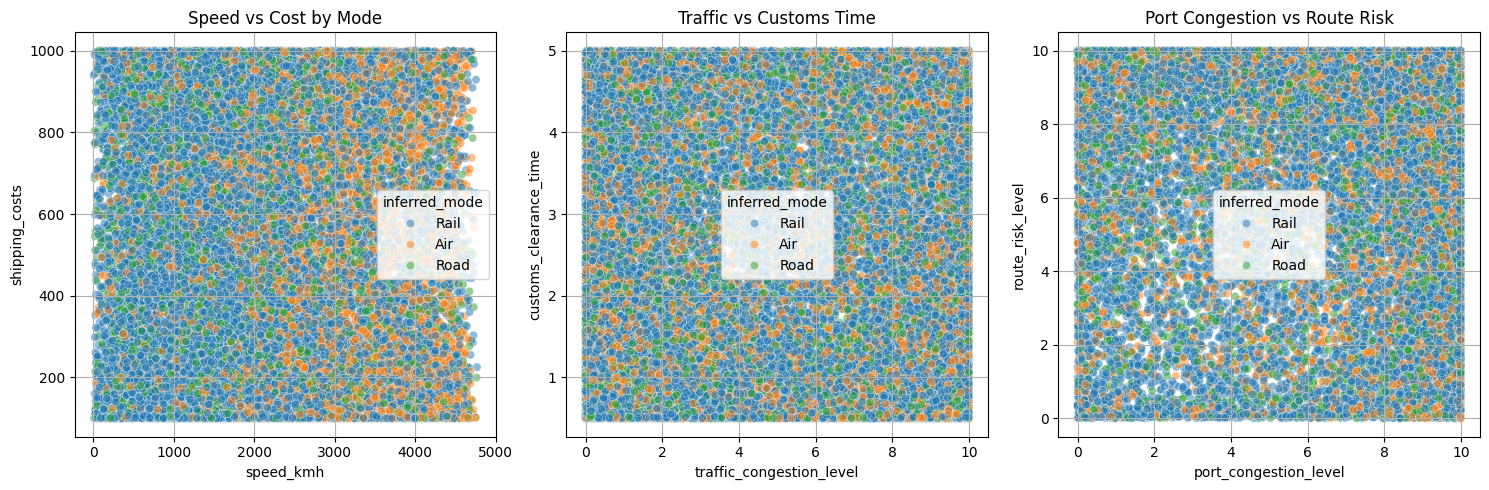


Mode Classification Logic:
--------------------------------------------------
Air Transport identified by:
- High speed (typically > 3000 km/h)
- Higher shipping costs
- Shorter lead times

Road Transport identified by:
- High traffic congestion exposure
- Moderate customs clearance times
- More frequent loading/unloading

Rail Transport identified by:
- Moderate speeds (1000-3000 km/h)
- Higher port congestion impact
- More consistent fuel consumption


In [25]:
# Analyze transport mode characteristics
print("Transport Mode Classification Analysis:")
print("-" * 50)

# Define key features for each mode with their descriptions
mode_features = {
    'Air': {
        'speed_kmh': 'Speed (km/h)',
        'shipping_costs': 'Shipping Costs',
        'lead_time_days': 'Lead Time (days)'
    },
    'Road': {
        'traffic_congestion_level': 'Traffic Congestion',
        'customs_clearance_time': 'Customs Time',
        'loading_unloading_time': 'Loading Time'
    },
    'Rail': {
        'port_congestion_level': 'Port Congestion',
        'route_risk_level': 'Route Risk',
        'fuel_consumption_rate': 'Fuel Consumption'
    }
}

# Calculate and display statistics for each mode
for mode, features in mode_features.items():
    print(f"\n{mode} Transport Characteristics:")
    print("-" * 30)
    
    mode_data = expanded_df[expanded_df['inferred_mode'] == mode]
    
    for feature_name, feature_label in features.items():
        stats = mode_data[feature_name].agg(['mean', 'median', 'std']).round(2)
        print(f"\n{feature_label}:")
        print(f"Mean: {stats['mean']}")
        print(f"Median: {stats['median']}")
        print(f"Std Dev: {stats['std']}")

# Visualize key distinguishing features
plt.figure(figsize=(15, 5))

# Speed vs Cost plot
plt.subplot(1, 3, 1)
sns.scatterplot(data=expanded_df, x='speed_kmh', y='shipping_costs', 
                hue='inferred_mode', alpha=0.5)
plt.title('Speed vs Cost by Mode')

# Traffic vs Customs Time
plt.subplot(1, 3, 2)
sns.scatterplot(data=expanded_df, x='traffic_congestion_level', 
                y='customs_clearance_time', hue='inferred_mode', alpha=0.5)
plt.title('Traffic vs Customs Time')

# Port Congestion vs Route Risk
plt.subplot(1, 3, 3)
sns.scatterplot(data=expanded_df, x='port_congestion_level', 
                y='route_risk_level', hue='inferred_mode', alpha=0.5)
plt.title('Port Congestion vs Route Risk')

plt.tight_layout()
plt.show()

print("\nMode Classification Logic:")
print("-" * 50)
print("Air Transport identified by:")
print("- High speed (typically > 3000 km/h)")
print("- Higher shipping costs")
print("- Shorter lead times")

print("\nRoad Transport identified by:")
print("- High traffic congestion exposure")
print("- Moderate customs clearance times")
print("- More frequent loading/unloading")

print("\nRail Transport identified by:")
print("- Moderate speeds (1000-3000 km/h)")
print("- Higher port congestion impact")
print("- More consistent fuel consumption")


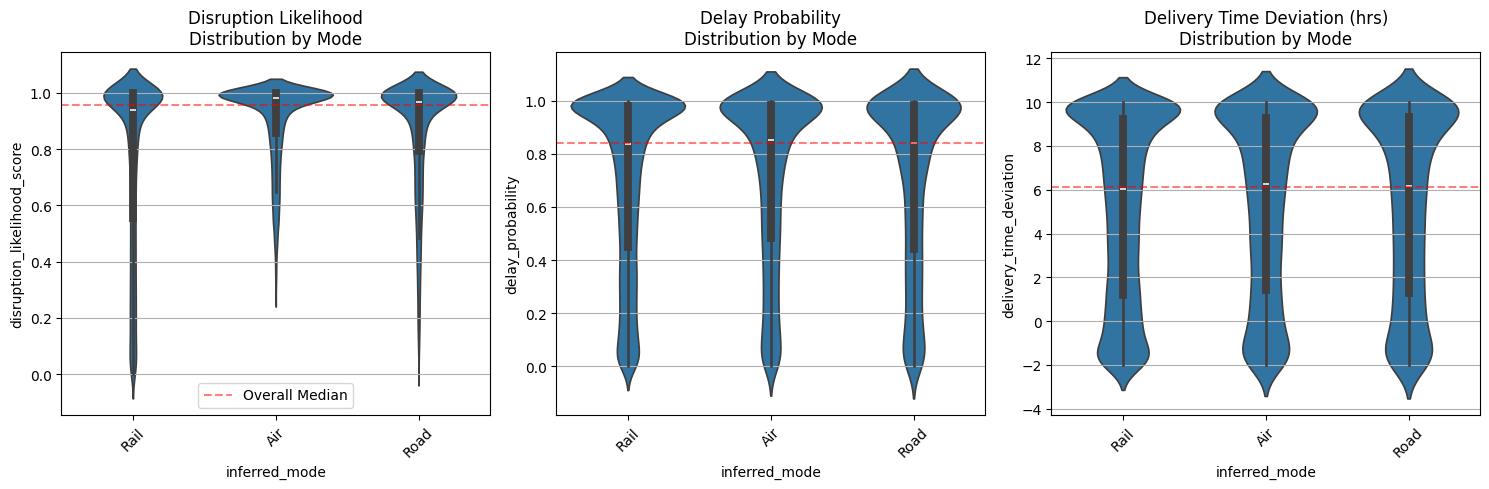


Distribution of Shipments by Mode:
Rail: 20,589 shipments (64.2%)
Air: 6,634 shipments (20.7%)
Road: 4,842 shipments (15.1%)


In [26]:
# Visualize risk distributions with violin plots
plt.figure(figsize=(15, 5))

for i, (metric, label) in enumerate(risk_metrics.items(), 1):
    plt.subplot(1, 3, i)
    
    # Create violin plot using expanded_df
    plot_data = expanded_df.copy()  # Create copy to avoid warnings
    sns.violinplot(data=plot_data, x='inferred_mode', y=metric, inner='box')
    plt.title(f'{label}\nDistribution by Mode')
    plt.xticks(rotation=45)
    
    # Add median line
    plt.axhline(y=plot_data[metric].median(), color='r', linestyle='--', alpha=0.5, label='Overall Median')
    
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

# Print distribution statistics
print("\nDistribution of Shipments by Mode:")
mode_counts = expanded_df['inferred_mode'].value_counts()
for mode, count in mode_counts.items():
    print(f"{mode}: {count:,} shipments ({count/len(expanded_df)*100:.1f}%)")


## Key Findings from Extended Analysis

### Correlations and Relationships
1. Identify which operational features show strongest correlations with risk metrics
2. Note any unexpected or counterintuitive relationships
3. Highlight potential causal relationships vs. correlations

### Mode-Specific Insights
1. Compare risk profiles across different transport modes
2. Identify which modes tend to have higher/lower risk levels
3. Note characteristic operational patterns for each mode

### Business Implications
1. Suggestions for mode-specific risk management strategies
2. Potential areas for risk reduction based on correlations
3. Operational levers that could be adjusted to manage risk

### Next Steps
1. Detailed analysis of high-risk scenarios by mode
2. Development of mode-specific risk thresholds
3. Investigation of interaction effects between operational factors
